In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Astrosat_Catalog.csv')

In [3]:
#method 1
print('Number of LMXB and HMXB:') #solved using two methods
print(df['Final_Type'].value_counts())

Number of LMXB and HMXB:
LMXB    121
HMXB    118
Name: Final_Type, dtype: int64


In [4]:
#method 2
print("Number of HMXB:",(df.Final_Type == 'HMXB').sum())
print("Number of LMXB:",(df.Final_Type == 'LMXB').sum())

Number of HMXB: 118
Number of LMXB: 121


In [5]:
df1 = df[df['SIMBAD_Name'] == 'Granat 1915+105']
print('ra =', df1['ra'].to_string(index = False)) #to_string(index = False) is used to remove index number
print('dec =', df1['dec'].to_string(index = False))
print("Coordinates:","(",df1['ra'].to_string(index = False), df1['dec'].to_string(index = False), ")")

ra = 288.820833
dec = 10.968333
Coordinates: ( 288.820833 10.968333 )


In [6]:
#In the each subsequent blocks a new df's are created and further the desired arrays are obtained
df2 = df[df['Final_Type'] == 'HMXB']
xH = df2.loc[:,'ra'].values
yH = df2.loc[:, 'dec'].values           #For HMXB
xH[xH>=180] = xH[xH>=180]- 360
xH = xH*np.pi/180
yH = yH*np.pi/180

df3 = df[df['Final_Type'] == 'LMXB']
xL = df3.loc[:,'ra'].values
yL = df3.loc[:, 'dec'].values           #For LMXB
xL[xL>=180] = xL[xL>=180]- 360
xL = xL*np.pi/180
yL = yL*np.pi/180

df4 = df[df['Astrosat_Flag'] == 1]
xA1 = df4.loc[:,'ra'].values
yA1 = df4.loc[:, 'dec'].values          #For observed
xA1[xA1>=180] = xA1[xA1>=180]- 360
xA1 = xA1*np.pi/180
yA1 = yA1*np.pi/180


df5 = df[df['Astrosat_Flag'] == 0]
xA0 = df5.loc[:,'ra'].values
yA0 = df5.loc[:, 'dec'].values          #For not observed, rest are clear
xA0[xA0>=180] = xA0[xA0>=180]- 360
xA0 = xA0*np.pi/180
yA0 = yA0*np.pi/180

df6 = df[(df['Final_Type'] == 'HMXB') & (df['Astrosat_Flag'] == 1)]
xHA1 = df6.loc[:,'ra'].values
yHA1 = df6.loc[:, 'dec'].values
xHA1[xHA1>=180] = xHA1[xHA1>=180]- 360
xHA1 = xHA1*np.pi/180
yHA1 = yHA1*np.pi/180

df7 = df[(df['Final_Type'] == 'HMXB') & (df['Astrosat_Flag'] == 0)]
xHA0 = df7.loc[:,'ra'].values
yHA0 = df7.loc[:, 'dec'].values
xHA0[xHA0>=180] = xHA0[xHA0>=180]- 360
xHA0 = xHA0*np.pi/180
yHA0 = yHA0*np.pi/180

df8 = df[(df['Final_Type'] == 'LMXB') & (df['Astrosat_Flag'] == 0)]
xLA0 = df8.loc[:,'ra'].values
yLA0 = df8.loc[:, 'dec'].values
xLA0[xLA0>=180] = xLA0[xLA0>=180]- 360
xLA0 = xLA0*np.pi/180
yLA0 = yLA0*np.pi/180

df9 = df[(df['Final_Type'] == 'LMXB') & (df['Astrosat_Flag'] == 1)]
xLA1 = df9.loc[:,'ra'].values
yLA1 = df9.loc[:, 'dec'].values
xLA1[xLA1>=180] = xLA1[xLA1>=180]- 360
xLA1 = xLA1*np.pi/180
yLA1 = yLA1*np.pi/180

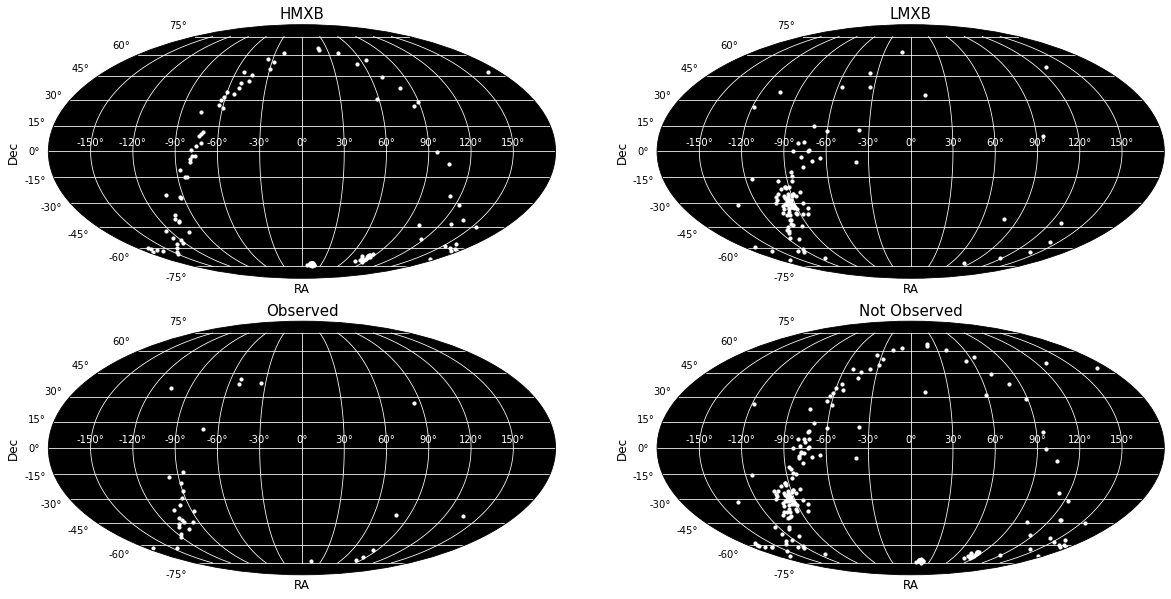

In [7]:
#individual plots
fig1=plt.figure(figsize=(20,20))

#For HMXB
ax=fig1.add_subplot(221, projection="mollweide",facecolor='black')
ax.scatter(xH,yH,s=10,c='b')
ax.set(title='HMXB')
ax.grid(c='w')
ax.title.set_fontsize(15)
ax.set_xlabel("RA")
ax.xaxis.label.set_fontsize(12)
ax.set_ylabel("Dec")
ax.yaxis.label.set_fontsize(12)
ax.tick_params(axis='x', colors='white')

#For LMXB
ax1=fig1.add_subplot(222, projection="mollweide",facecolor='black')
ax1.scatter(xL,yL,s=10,c='r')
ax1.set(title='LMXB')
ax1.grid(c='w')
ax1.title.set_fontsize(15)
ax1.set_xlabel("RA")
ax1.xaxis.label.set_fontsize(12)
ax1.set_ylabel("Dec")
ax1.yaxis.label.set_fontsize(12)
ax1.tick_params(axis='x', colors='white')

#For observed
ax2=fig1.add_subplot(121, projection="mollweide",facecolor='black')
ax2.scatter(xA1,yA1,s=10,c='y')
ax2.set(title='Observed')
ax2.grid(c='w')
ax2.title.set_fontsize(15)
ax2.set_xlabel("RA")
ax2.xaxis.label.set_fontsize(12)
ax2.set_ylabel("Dec")
ax2.yaxis.label.set_fontsize(12)
ax2.tick_params(axis='x', colors='white')

#For not obsereved
ax3=fig1.add_subplot(122, projection="mollweide",facecolor='black')
ax3.scatter(xA0,yA0,s=10,c='magenta')
ax3.set(title='Not Observed')
ax3.grid(c='w')
ax3.title.set_fontsize(15)
ax3.set_xlabel("RA")
ax3.xaxis.label.set_fontsize(12)
ax3.set_ylabel("Dec")
ax3.yaxis.label.set_fontsize(12)
ax3.tick_params(axis='x', colors='white')
plt.show()

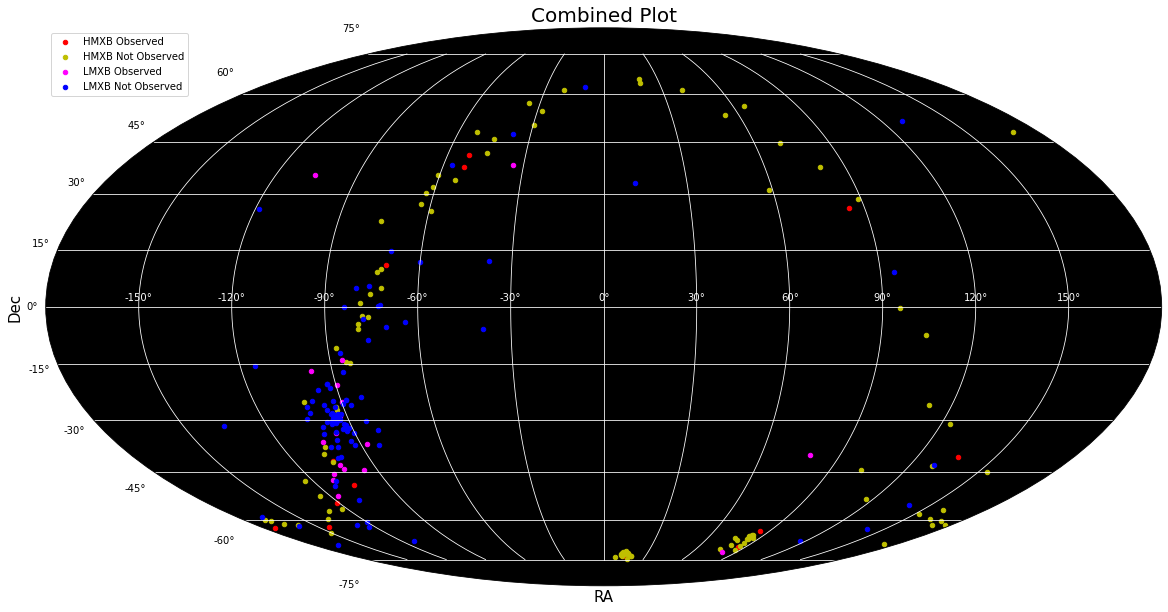

In [8]:
#combined plot
fig2=plt.figure(figsize=(20,20))

ax=fig2.add_subplot(projection="mollweide",facecolor='black')
ax.scatter(xHA1,yHA1,s=20,c='r', label='HMXB Observed')
ax.scatter(xHA0,yHA0,s=20,c='y', label='HMXB Not Observed')
ax.scatter(xLA1,yLA1,s=20,c='magenta', label='LMXB Observed')
ax.scatter(xLA0,yLA0,s=20,c='blue', label='LMXB Not Observed')
ax.set(title='Combined Plot')
ax.grid(c='w')
ax.title.set_fontsize(20)
ax.set_xlabel("RA")
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel("Dec")
ax.yaxis.label.set_fontsize(15)
ax.tick_params(axis='x', colors='white')
leg = ax.legend(loc = 'upper left')



The thing interesting about this plot is that most star systems are near the equator which represents the milky-way galaxy.

2 arcmin is a bad resolution as nowdays the resolutions are in arcseconds.